<a href="https://colab.research.google.com/github/imjh1/pytorch_tutorial/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

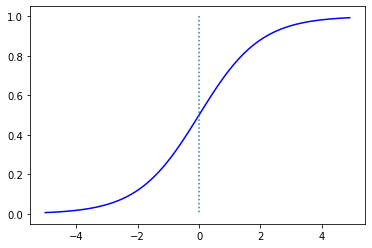

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'b')
plt.plot([0,0], [1.0,0.0], ":")

#함수의 모양(W)과 위치(b)를 결정하는 계수

#W값에 따른 그래프의 모양

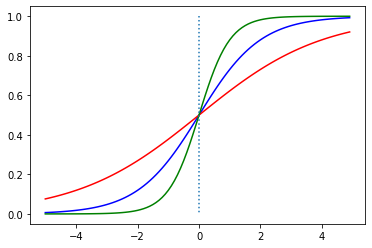

In [ ]:
y1 = sigmoid(0.5 * x)
y2 = sigmoid(2 * x)

plt.plot(x,y,'b')
plt.plot(x,y1,'r')
plt.plot(x,y2,'g')
plt.plot([0,0],[1.0,0.0], ":")

#b값에 따른 그래프 위치의 변화 (좌, 우)



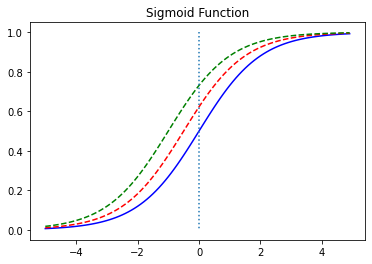

In [ ]:
y1 = sigmoid(0.5 + x)
y2 = sigmoid(1 + x)

plt.plot(x,y,'b')
plt.plot(x,y1,'r', linestyle = '--')
plt.plot(x,y2,'g', linestyle = '--')
plt.plot([0,0],[1.0,0.0], ":")
plt.title('Sigmoid Function')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [ ]:
h = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
print(h)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
h = torch.sigmoid(x_train.matmul(W) + b)
print(h)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [ ]:
losses = -(y_train*torch.log(h) + (1-y_train)*torch.log(1-h))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [ ]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
cost = F.binary_cross_entropy(h, y_train)
print(cost)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)


# 학습

In [ ]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr = 1)
num_epochs = 1000
for epoch in range(num_epochs): #tqdm
  #cost
  h = torch.sigmoid(x_train.matmul(W)+b)
  cost = F.binary_cross_entropy(h, y_train)

  #backpropagation
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, num_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888


In [ ]:
hypo = torch.sigmoid(x_train.matmul(W)+b)
print(hypo)

tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [ ]:
prediction = hypo >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
